In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2

/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2


In [ ]:
!ls

BetterRnnlm.pkl  ch03  ch06  common	equations_and_figures_2.zip  Rnnlm.pkl
ch01		 ch04  ch07  cover.png	LICENSE.md
ch02		 ch05  ch08  dataset	README.md


# 7.1 언어 모델을 사용한 문장 생성

## 7.1.1 RNN을 사용한 문장 생성의 순서

* 단어 생성을 어떻게 할까?
1. 확률이 가장 높은 단어를 선택 ( 결정적)
2. 확률적으로 선택 -> 선택되는 단어가 매번 다를 수 있다. ( 확률적 )


* 언어 모델은 훈련데이터를 암기한 것이 아니라, 훈련 데이터에서 사용된 단어의 정렬 패턴을 학습한다.
* 단어의 출현 패턴을 올바르게 학습한다면, 그 모델이 새로 생성하는 문장은 인간에게 자연스럽고 의미가 통하는 문자일 것 이다.

In [ ]:
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm


class RnnlmGen(Rnnlm):
    # start_id : 최초로 주는 단어, sample_size : 샘플링하는 단어의 수, skip_ids : 샘플링이 되지않을 단어 id의 리스트
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1) # 미니배치 처리를 고려한 2차원 배열 reshape
            score = self.predict(x) # 각 단어의 점수를 출력
            p = softmax(score.flatten()) # 이 점수들을 소프트맥스 함수를 이용해 정규화

            sampled = np.random.choice(len(p), size=1, p=p) # 정규화된 확률분포 p를 이용해 샘플링
            if (skip_ids is None) or (sampled not in skip_ids): # skip word가 아니면 문장에 추가
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        return self.lstm_layer.h, self.lstm_layer.c

    def set_state(self, state):
        self.lstm_layer.set_state(*state)


In [ ]:
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2/ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you n't need gross controls on the ahead of the 1990s 's debut of trading.
 the expenditure publication is currently too strong legislatures by the day may be suspended.
 the fibers aerospace operator raised its quarterly profit.
 the benefits closed to swap passenger developer computer records and the breeden purchase upon them to run with the liquidation after tandy 's national partnership from central county inc.
 because of brings between two groups and dozens of the longstanding transcanada traded firms and local oppose u.s. households.
 it is headed by the pockets of programming.
 borrowed


* 모델의 가중치 초깃값으로 무작위한 값을 사용했기 때문에 이러한 결과가 출력됨.

## 7.1.3 더 좋은 문장으로

In [ ]:
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = BetterRnnlmGen()
model.load_params('/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you question to moral the fact.
 talent which is to all produce me hopefully 's to go me any month he says.
 it should be able to make a more comparisons in foreign exchange that has been under attack even if the withdrawals rise to which much short-term rates are expected to be flat for funds and interest rates.
 that is the word for the burden.
 one bank outlays that post a year earlier this year came seven improvement and trend the decline in dividends.
 if seita 's interest reflects an important practical sense of


In [ ]:
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('/content/drive/MyDrive/Study/NLP/밑딥2/deep-learning-from-scratch-2/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

you were not aware of it.
 the mayor dick zenith a sweeping legislator who has been warned to do when the federal reserve board announced that it was an unlikely move to trade its own building.
 gm would begin to remedy its trade efforts and the weakness of all painfully the markets but requires the issue to be small as well.
 the any longer create the first one of the nation 's republics in years has mr. gorbachev said while up it was enough to ease up other markets.
 banco exterior 's u.s. discount processing plunged
--------------------------------------------------
the meaning of life is in a great deal.
 jack smith a spokesman for telecommunications operations in washington d.c. says i think you are n't important as much as i do n't think anybody who would end to get a portion of our funds may have been about there.
 someone still is a one other fan who said he understands it was a good window for employees but the formula making profits look public.
 for example pressure for ange

# 7.2 seq2seq

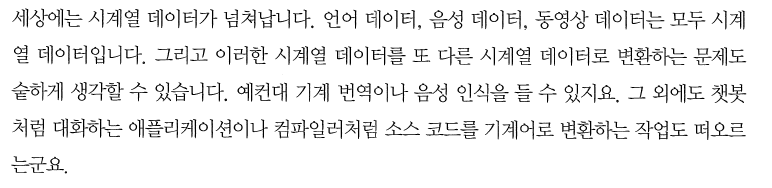

* 시계열 데이터를 다른 시계열 데이터로 변환하는 모델

## 7.2.1 seq2seq의 원리

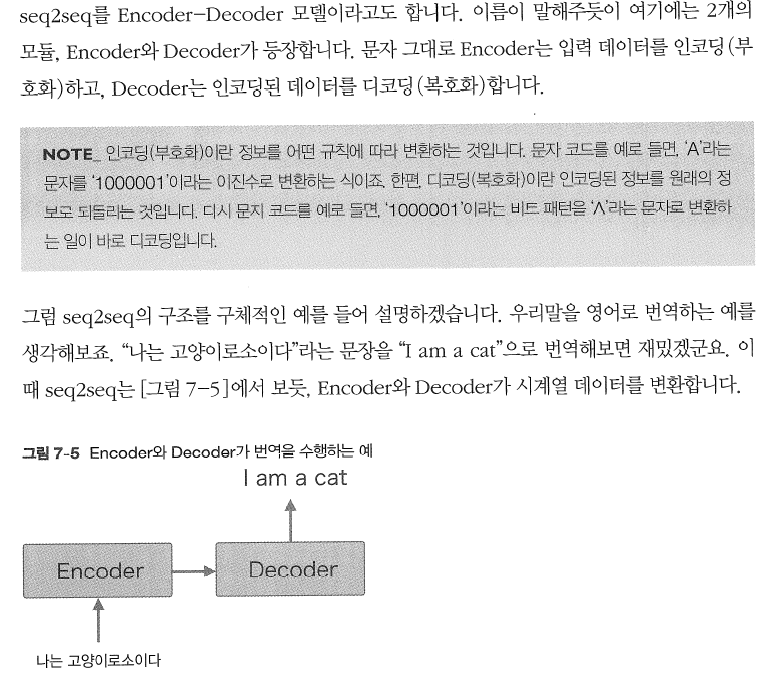

### seq2seq의 구조 : Encoder

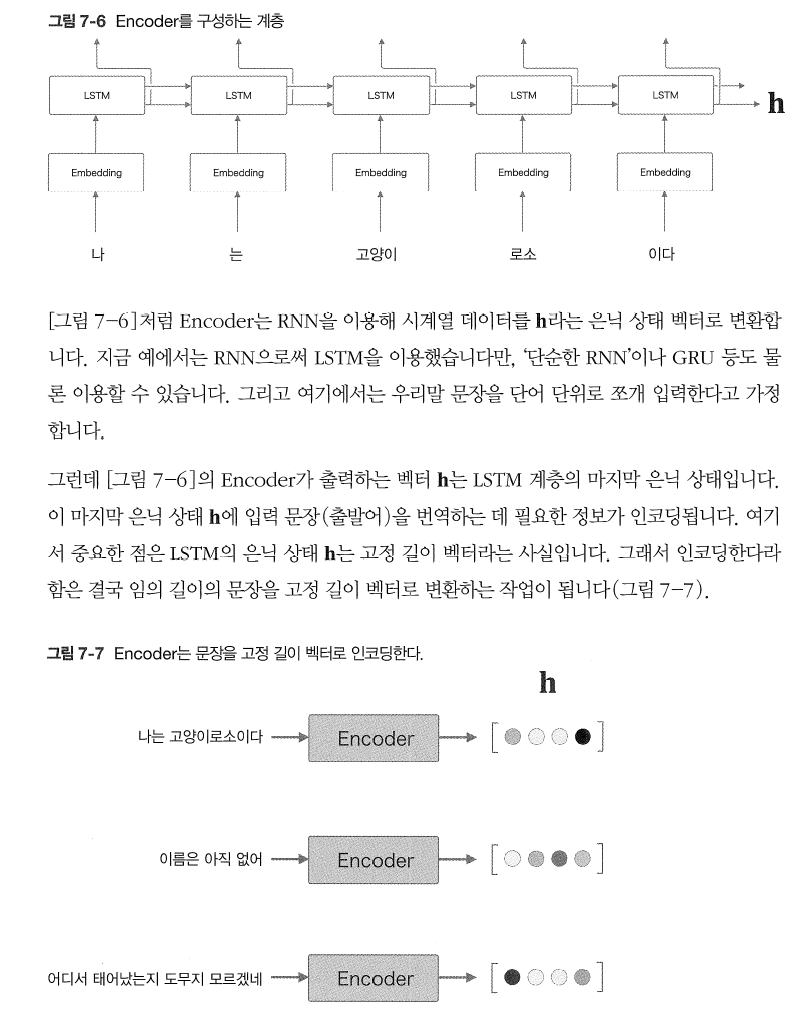

### seq2seq의 구조 : Decoder

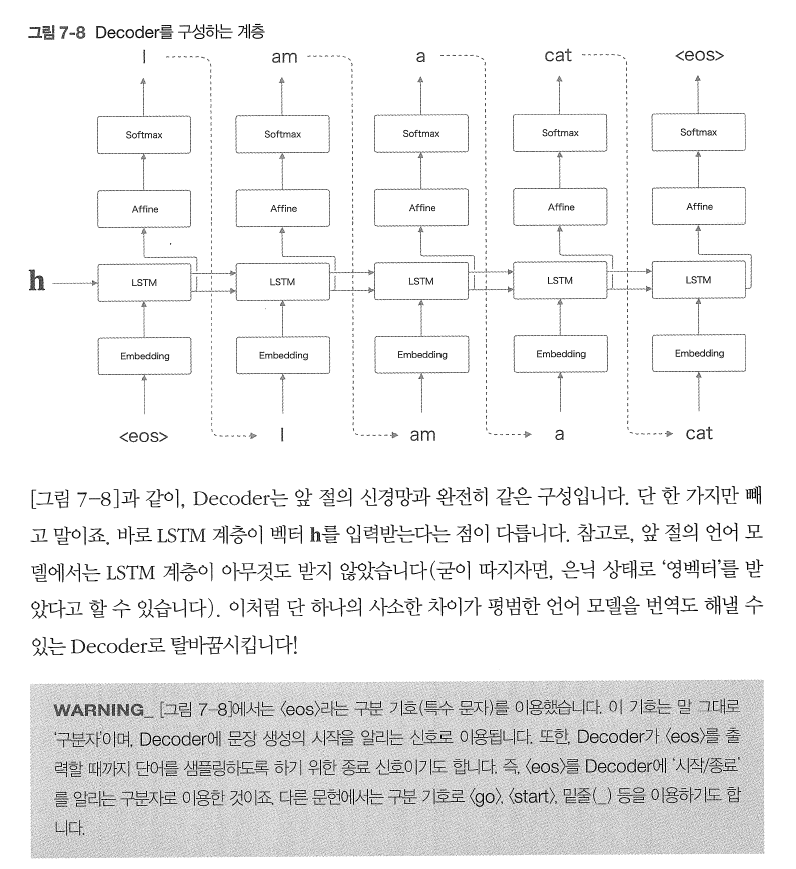

## 7.2.2 시계열 데이터 변환용 장난감 문제

* 기계가 덧셈의 논리 규칙을 올바르게 학습할 수 있을까?


## 7.2.3 가변 길이 시계열 데이터

* 가변길이 시계열 데이터는 데이터의 시간방향크기(길이) 가 다르므로, '미니배치 처리'를 하기 위해선 추가 노력이 필요하다.

* padding 사용 하여 데이터의 길이를 균일하게 맞춘다.

## 7.2.4 덧셈 데이터셋

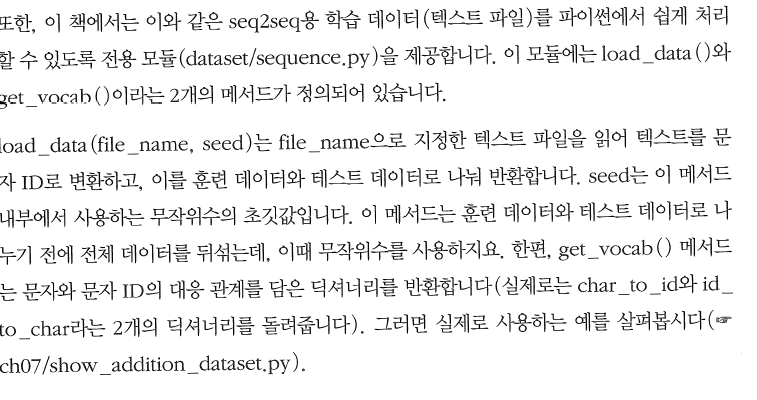

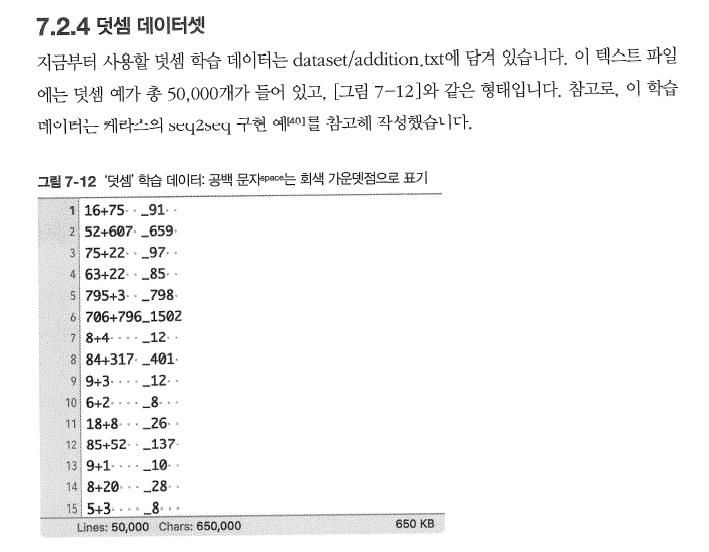

In [ ]:
from dataset import sequence
import dataset

# 지정한 텍스트 파일을 읽어 텍스트를 문자 id로 변환, 훈련 데이터와 테스트 데이터로 나눠 반환
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984) 

# 문자와 id의 대응 관계를 담은 딕셔너리 반환
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


# 7.3 seq2seq 구현

## 7.3.1 Encoder 클래스

In [ ]:
from common.time_layers import *
from common.base_model import BaseModel

In [ ]:

class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        
        # vocab_size = 어휘 수, 문자의 종류 : 0~9 ...  - 13 가지
        # wordvec_size = 문자 벡터의 차원 수 
        # hidden_size = LSTM 계층의 은닉상태 벡터의 차원 수 

        V, D, H = vocab_size, wordvec_size, hidden_size 
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        # 필요 계층 생성
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False) # 긴 시계열 데이터를 처리하지 않으므로 False.

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs 
        return hs[:, -1, :] # Time LSTM 계층의 마지막 시각(index : -1)의 은닉 상태만을 추출해서 forward의 출력으로 반환

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh # 마지막 은닉 상태에 대한 기울기가 parameter로 전해짐(Decoder가 전해준다)

        #forward의 역순서로 호출

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

## 7.3.2 Decoder 클래스

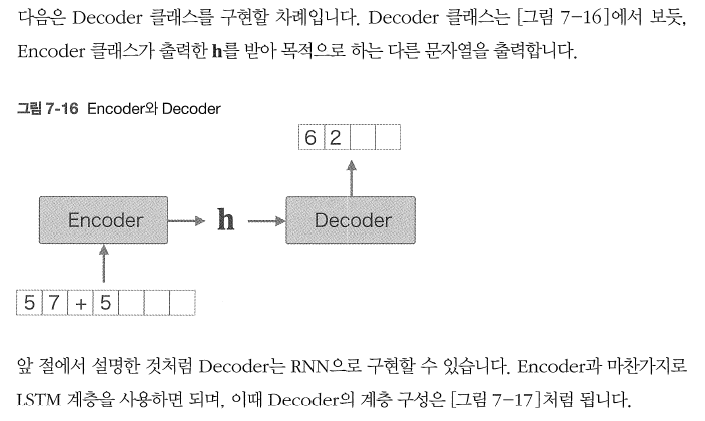

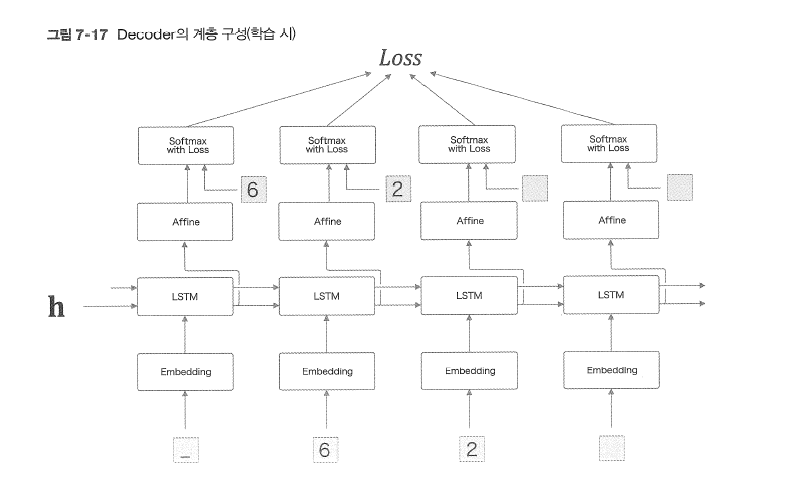

* 확률적이 아닌 결정적으로 답을 내야하는 문제
* softmax 계층이 아닌 Affine 계층 + argmax 노드 사용

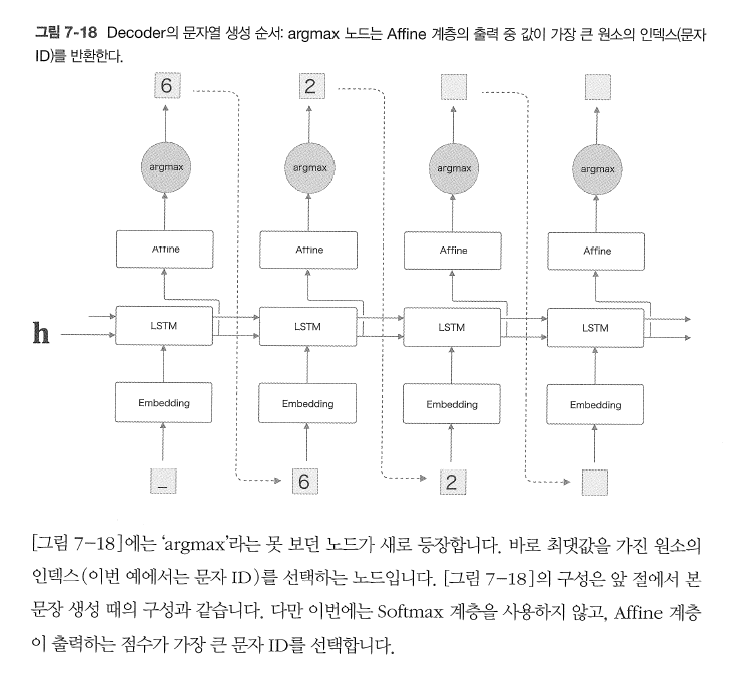

* Decoder에서는 학습 시와 생성 시에 softmax 계층을 다르게 취급
* Softmax with Loss 계층은 이후에 구현하는 seq2seq 클래스에서 처리하기로 하고, Decoder 클래스는 Time Softmax with Loss 계층의 앞 까지만 담당.

In [ ]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')

        # g,i,o,f 에 대한 가중치를 모아둔 행렬
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    # 계층 차례로 호출
    # 학습에 사용 !!
    def forward(self, xs, h): 
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    # 위쪽의 Softmax with Loss 계층으로부터 기울기 dscore를 받아 순전파의 역순으로 전파.
    # Time LSTM 계층의 시간 방향으로의 기울기는 인스턴스 변수 dh에 저장됨. 이것은 출력으로 반환.

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    # 문장 생성시의 동작은 학습시와 다르다. !!
    def generate(self, h, start_id, sample_size): # Encoder의 은닉 상태 h, 최초로 주어지는 문자 start_id, 생성하는 문자의 수 sample_size
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h) # Encoder의 은닉상태 벡터 h로 시작, stateful

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id)) # 결정적 단어 선택.

        return sampled

## 7.3.3 Seq2seq 클래스

* Encoder 클래스와 Decoder 클래스를 연결하고, Time Softmax with Loss 계층을 이용해 손실을 계산한다.

In [ ]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    # 학습! xs : 시계열 데이터 입력, ts : 정답 시계열 데이터
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:] # ?? 양쪽 데이터 제거. (시작, 끝값인가?)

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    # 그냥 역순 호출!
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

## 7.3.4 seq2seq 평가

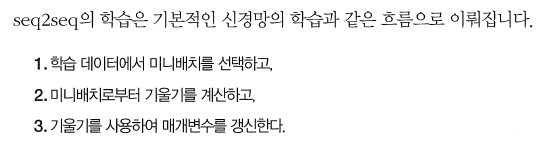

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 8[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 16[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 17[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 20[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 21[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
--

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

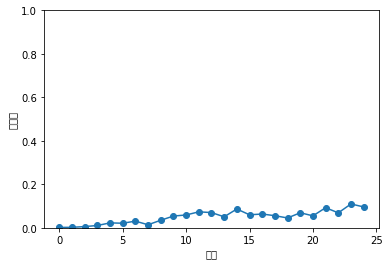

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
import dataset
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
# from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제를 모델에 주고, 문자열을 생성하게 하여 그것이 답과 같은지를 판정한다. 답이 맞다면 1, 틀리면 0
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()


# 7.4 seq2seq 개선

* 학습속도의 개선 
1. 입력 데이터 반전(Reverse)
2. 엿보기(Peeky)

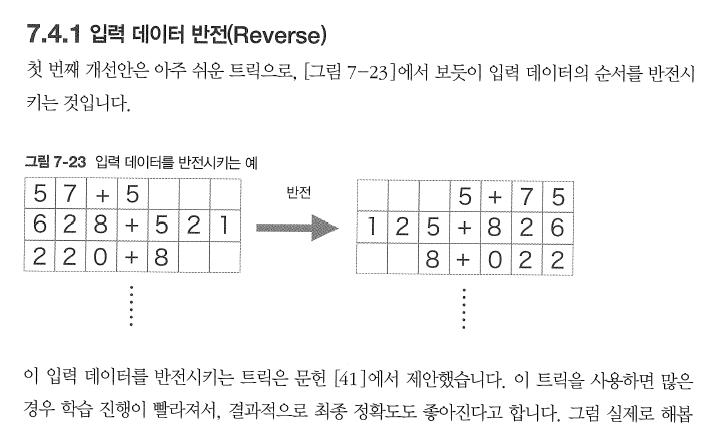

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 14[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 17[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 18[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 20[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 22[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1001
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
--

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

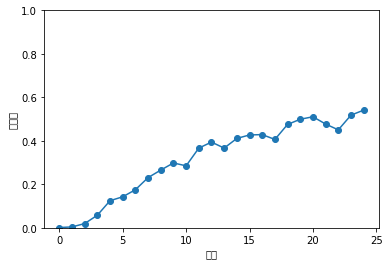

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
import dataset
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
# from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # False
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제를 모델에 주고, 문자열을 생성하게 하여 그것이 답과 같은지를 판정한다. 답이 맞다면 1, 틀리면 0
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()


* 기울기 전파가 원활해진다. -> 학습의 진행 빨라지고, 정확도가 향상

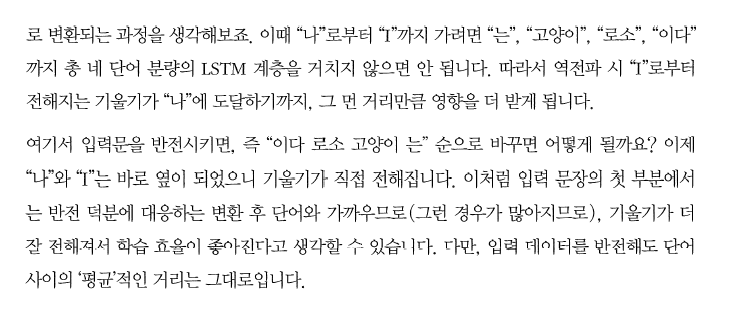

## 7.4.2 엿보기(Peeky)

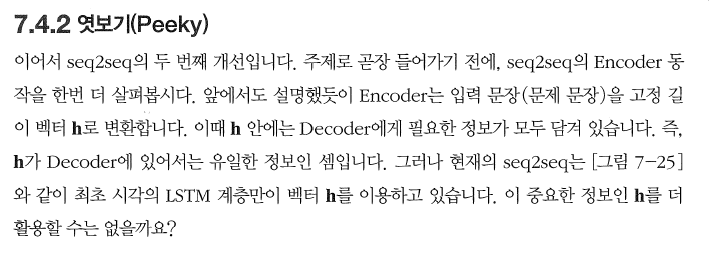

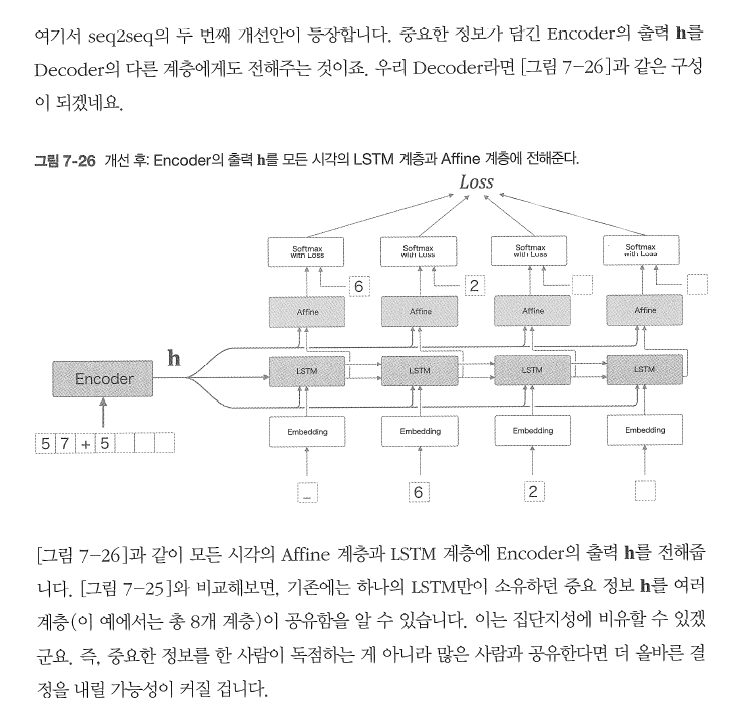

In [ ]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f') # Encoder가 인코딩한 벡터도 입력되기때문에 가중치 매개변수의 형상이 그만큼 커진다.
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f') #  Encoder가 인코딩한 벡터도 입력되기때문에 가중치 매개변수의 형상이 그만큼 커진다.
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H) 

        # hs와 Embedding 계층의 출력을 연결해서 LSTM에 입력. 
        out = np.concatenate((hs, out), axis=2) 

        out = self.lstm.forward(out)

        # hs와 LSTM 계층의 출력을 연결해서 Affine에 입력. 
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out) 
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H) # Decoder대신 PeekyDecoder 사용
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 8[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 14[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 20[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 21[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1001
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
--

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

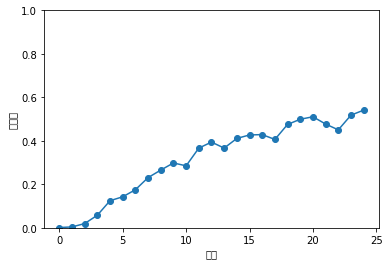

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
import dataset
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # False
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        # 문제를 모델에 주고, 문자열을 생성하게 하여 그것이 답과 같은지를 판정한다. 답이 맞다면 1, 틀리면 0
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

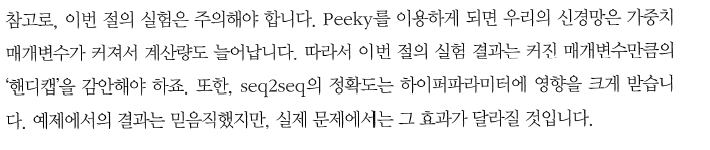

# 7.5 seq2seq를 이용하는 애플리케이션

* 시계열 데이터를 다른 시계열 데이터로 변환하는 프레임워크

* 기계번역, 자동요약, 질의응답, 메일 자동 응답

## 7.5.1 챗봇

## 7.5.2 알고리즘 학습

## 7.5.3 이미지 캡셔닝

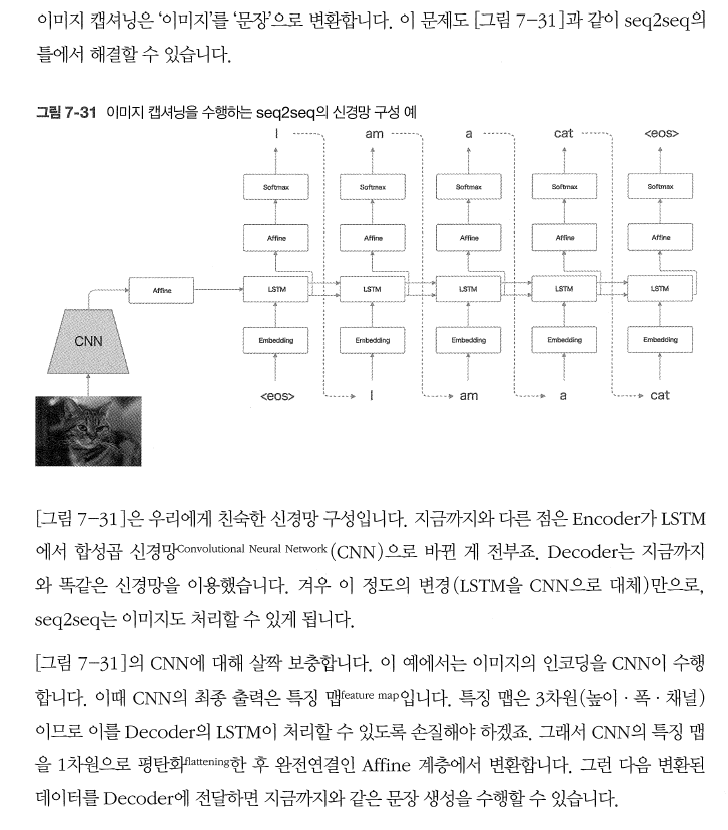

# 7.6 정리

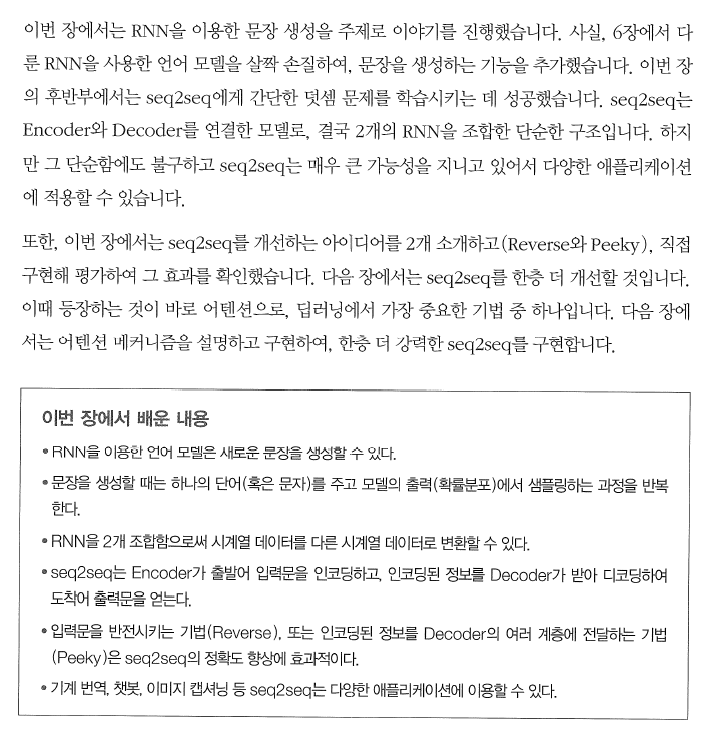